In [1]:
from analysis.data_loader import load_stock_data, load_news_data
from analysis.sentiment import add_sentiment_column
from analysis.returns import calculate_daily_returns
from analysis.correlation import merge_and_correlate
from analysis.plot import plot_sentiment_vs_returns, plot_correlation_heatmap, plot_boxplot_by_sentiment_group, plot_joint_regression


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mesfin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Load stock data
stock_df = load_stock_data("AAPL", "2010-01-01", "2011-01-01")

# shape of stock_df
print("Stock Data Shape:", stock_df.shape)

[*********************100%***********************]  1 of 1 completed

Stock Data Shape: (252, 5)


In [4]:
# Load news data
news_df = load_news_data("../data/raw_analyst_ratings.csv/raw_analyst_ratings.csv")

# shape of stock data
print(f"Stock Data Shape: {news_df.shape}")

Stock Data Shape: (1407328, 6)


In [5]:
# reduce news data by date range
news_df = news_df[(news_df['date'] >= '2010-01-01') & (news_df['date'] <= '2011-01-01')]

# shape of news data
print(f"News Data Shape: {news_df.shape}")

News Data Shape: (81319, 6)


In [6]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2009-01-02 to 2011-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
 1   High    756 non-null    float64
 2   Low     756 non-null    float64
 3   Open    756 non-null    float64
 4   Volume  756 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.4 KB


In [6]:
# Reset index to date
stock_df.reset_index(inplace=True)
stock_df.rename(columns={'index': 'date'}, inplace=True)

stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   Close   252 non-null    float64       
 2   High    252 non-null    float64       
 3   Low     252 non-null    float64       
 4   Open    252 non-null    float64       
 5   Volume  252 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [ ]:
import pandas as pd
# Step 1: Convert to datetime safely
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', errors='coerce')

# Step 2: Drop rows that couldn't be parsed (optional but avoids errors later)
news_df = news_df.dropna(subset=['date'])

# Step 3: Remove timezone info **only if column is timezone-aware**
if pd.api.types.is_datetime64tz_dtype(news_df['date']):
    news_df['date'] = news_df['date'].dt.tz_localize(None)

C:\Users\Mesfin\AppData\Local\Temp\ipykernel_46924\937371710.py:9: DeprecationWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if pd.api.types.is_datetime64tz_dtype(news_df['date']):


In [28]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81319 entries, 814 to 1407258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  81319 non-null  int64         
 1   headline    81319 non-null  object        
 2   url         81319 non-null  object        
 3   publisher   81319 non-null  object        
 4   date        81319 non-null  datetime64[ns]
 5   stock       81319 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.3+ MB


In [8]:
# Process
stock_df = calculate_daily_returns(stock_df)

In [ ]:
news_df = add_sentiment_column(news_df)

In [11]:
merged, corr = merge_and_correlate(stock_df, news_df)

In [12]:
merged.info()
print("Correlation between sentiment and returns:", corr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          252 non-null    datetime64[ns]
 1   Close         252 non-null    float64       
 2   High          252 non-null    float64       
 3   Low           252 non-null    float64       
 4   Open          252 non-null    float64       
 5   Volume        252 non-null    int64         
 6   daily_return  251 non-null    float64       
 7   date          252 non-null    datetime64[ns]
 8   sentiment     252 non-null    float64       
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 17.8 KB
Correlation between sentiment and returns: 0.135071564473489


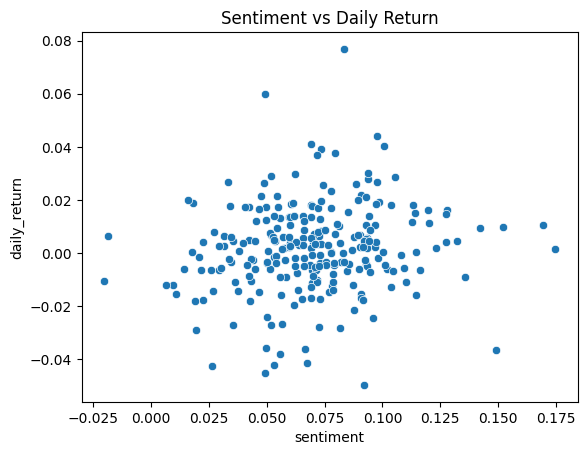

In [34]:
# Output
# print(f"Correlation: {corr}")
plot_sentiment_vs_returns(merged)

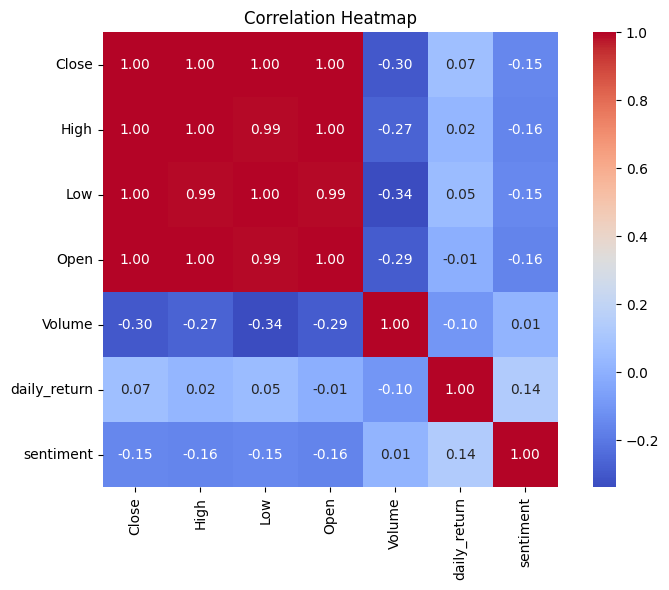

In [ ]:
plot_correlation_heatmap(merged)

c:\ME\KAIM\stock-challenge-week-1\notebooks\analysis\plot.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_group', y='daily_return', data=df, palette='Set2')


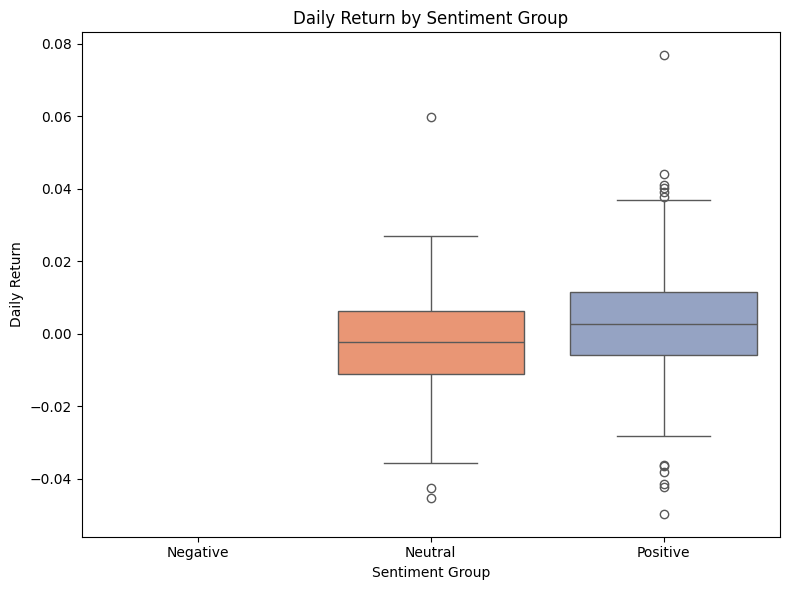

In [14]:
plot_boxplot_by_sentiment_group(merged)

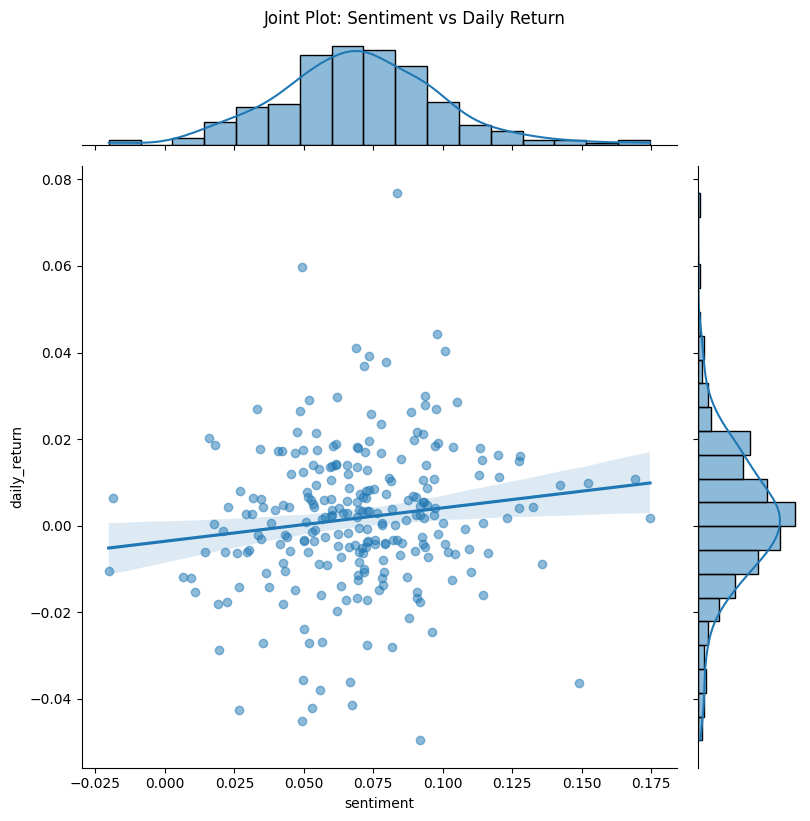

In [15]:
plot_joint_regression(merged)
